In [159]:
import pandas as pd
import numpy as np

# Storing the dataset into the variable dataset and making the "DATE" column the index column.
dataset = pd.read_csv("weather.csv", index_col="DATE")


In [160]:
# For each column, store the percentage of missing values.
miss_pct = dataset.apply(pd.isnull).sum()/dataset.shape[0]

In [161]:
# Print the missing values percentages for each column.
miss_pct

STATION    0.000000
NAME       0.000000
ACMH       0.524697
ACSH       0.524549
AWND       0.253967
FMTM       0.496925
PGTM       0.281145
PRCP       0.000099
PSUN       0.746528
SNOW       0.000000
SNWD       0.419411
TAVG       0.651012
TMAX       0.000000
TMIN       0.000000
TSUN       0.508034
WDF1       0.822059
WDF2       0.475997
WDF5       0.477187
WDFG       0.528913
WDFM       0.703829
WESD       0.678040
WSF1       0.822059
WSF2       0.475997
WSF5       0.477187
WSFG       0.528367
WSFM       0.703829
WT01       0.618826
WT02       0.942521
WT03       0.953481
WT04       0.980311
WT05       0.980262
WT06       0.987899
WT07       0.996925
WT08       0.868082
WT09       0.991024
WT10       0.999950
WT11       0.999058
WT13       0.884497
WT14       0.938603
WT15       0.996578
WT16       0.667526
WT17       0.996429
WT18       0.905921
WT19       0.998115
WT21       0.999901
WT22       0.995437
dtype: float64

In [162]:
# List columns with low miss_pct (good columns); feel free to tweak the threshold of how low we want missing values to be.
good_columns = dataset.columns[miss_pct < 0.01]

In [163]:
good_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [164]:
dataset = dataset[good_columns].copy()

In [165]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18
...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35


In [166]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.000099
SNOW       0.000000
TMAX       0.000000
TMIN       0.000000
dtype: float64

In [167]:
#Since the "PRCP" column has missin values, we fill the missing values with zero since
#if there was no PRCP recorded for that day then that must mean that it did not rain therefore PRCP would be zero

dataset["PRCP"] = dataset["PRCP"].fillna(0)

In [168]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

STATION    0.0
NAME       0.0
PRCP       0.0
SNOW       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

In [169]:
dataset.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
TMAX         int64
TMIN         int64
dtype: object

In [170]:
dataset.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
       '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16'],
      dtype='object', name='DATE', length=20164)

In [171]:
# Change dtype from object to datetime.
dataset.index = pd.to_datetime(dataset.index)

In [172]:
dataset.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-15', '2025-03-16'],
              dtype='datetime64[ns]', name='DATE', length=20164, freq=None)

In [173]:
# Example of why converting dates from object to dates is helpful:
dataset.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=20164)

In [174]:
# Checking for gaps in dataset (if certain years have more rows than others; ideally each year should have around 365-ish rows).
dataset.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     75
Name: count, dtype: int64

<Axes: xlabel='DATE'>

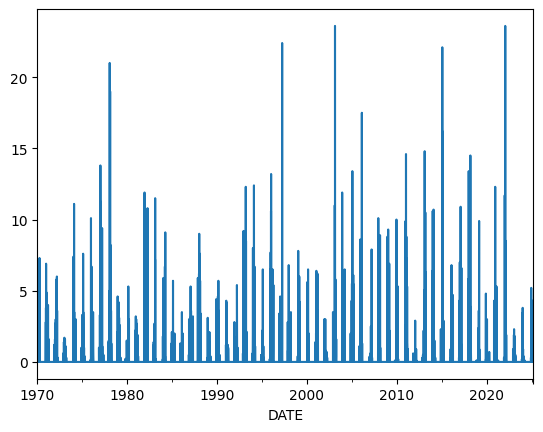

In [175]:
# Plot of snow depth in Boston.
dataset["SNOW"].plot()

In [176]:
# Filling in the new predictor tmrw_temp: 
# Shifting down the TMAX values by one position, which makes each value the next day's maximum temperature from the original TMAX column.
# Assigning this to a new column in the original DataFrame called tmrw_temp to align tomorrow's temperature prediction with the next day's max temperature.
dataset["tmrw_temp"] = dataset.shift(-1)["TMAX"]

# tmrw_rain predication (another response variable)
dataset["tmrw_rain"] = (dataset["PRCP"].shift(-1) > 0).astype(int)
dataset = dataset.dropna(subset=["tmrw_rain"])

In [177]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_temp,tmrw_rain
DATE,,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,28.0,0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,30.0,1
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,27.0,1
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,30.0,0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,31.0,0
...,...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,44.0,0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,46.0,0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,62.0,0


In [178]:
# Filling last tmrw_temp with the one before since we don't know tmrw_temp actual temp for a day that has not yet come!
dataset = dataset.ffill()


In [179]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_temp,tmrw_rain
DATE,,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,28.0,0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,30.0,1
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,27.0,1
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,30.0,0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,31.0,0
...,...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,44.0,0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,46.0,0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,62.0,0


Text(0.5, 1.0, 'Correlation Heatmap')

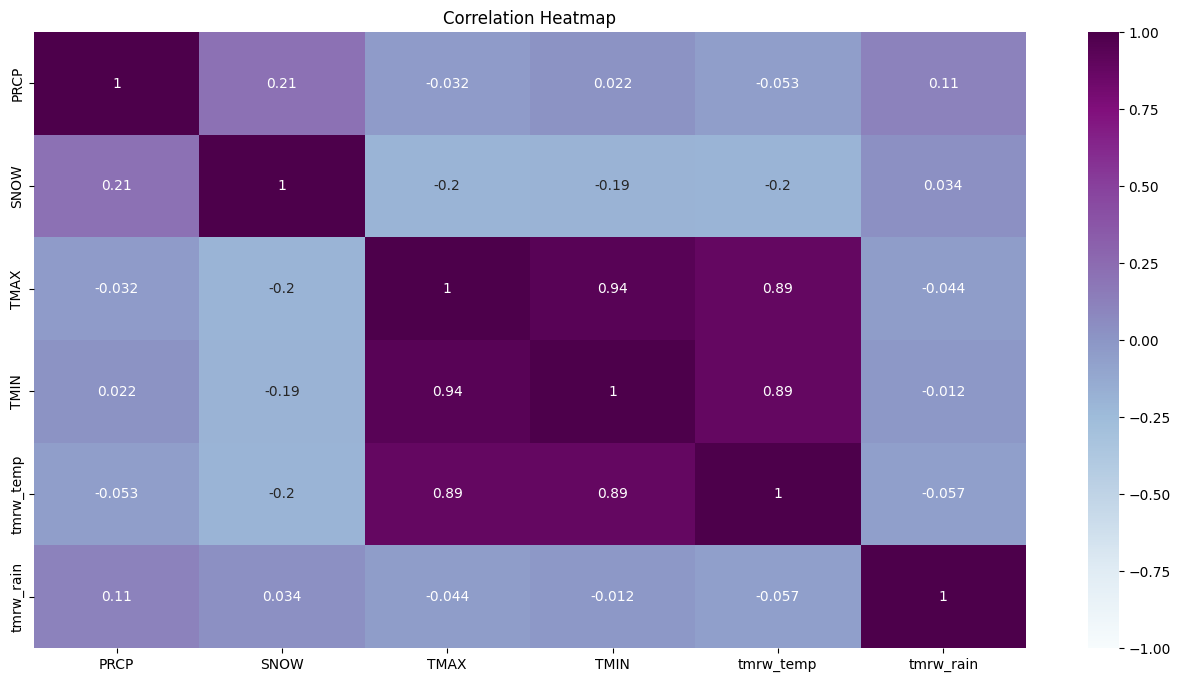

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using Pearson correlation coefficient between the numeric predictors.
numeric_dataset = dataset.drop(columns=['STATION', 'NAME'], errors='ignore')

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(numeric_dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap')

In [181]:
#As we can see, TMAX and TMIN are heavily correlated, TMAX and tmrw_temp are also heavily correlated. 
# Other predictors are not highly correlated, which makes sense.

Evaluating the Performance of Different Ensemble and Training Models for Temperature Forecasting

In [182]:
from sklearn.base import clone

# In this example the model starts predicting after it 10 years, (training on 10 years and predicting the next years till 2025 in 90 day intervals to account for seasons and such)
def backtest(weather, model_temp, model_rain, predictors, start=3650, step=90):
    all_predictions_temp = []
    all_predictions_rain = []

    for i in range(start, weather.shape[0], step):
        # training is from day 1 to i, i here is 3650 so training would be done on first 10 years in this case!
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        # fitting the model giving it the predictors and the target to train on
        # model_temp_clone = clone(model_temp)
        model_temp.fit(train[predictors], train["tmrw_temp"])
        # model_rain_clone = clone(model_rain)
        model_rain.fit(train[predictors], train["tmrw_rain"])

        # predicting the taregt for the test data but here we're obviously only given the predictors and our goal is to predict the target
        temp_preds = model_temp.predict(test[predictors])
        rain_preds = model_rain.predict(test[predictors])

        # creating series for manipulating and combining
        temp_preds_series = pd.Series(temp_preds, index=test.index)
        rain_preds_series = pd.Series(rain_preds, index=test.index)

        # combining each 90 day interval into one big list for both predictors
        temp_combined = pd.DataFrame({
            "actual_temp": test["tmrw_temp"],
            "predicted_temp": temp_preds,
            "temp_diff": (temp_preds - test["tmrw_temp"]).abs()
        }, index=test.index)

        rain_combined = pd.DataFrame({
            "actual_rain": test["tmrw_rain"],
            "predicted_rain": rain_preds,
            "rain_diff": (rain_preds - test["tmrw_rain"]).abs()
        }, index=test.index)
        
        # Combine both temperature and rain predictions
        all_predictions_temp.append(temp_combined)
        all_predictions_rain.append(rain_combined)
        
    return pd.concat(all_predictions_temp), pd.concat(all_predictions_rain)

In [183]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

predictors = ['TMAX', 'TMIN', 'PRCP', 'SNOW']

X = dataset[predictors].dropna()
y = dataset['tmrw_temp'].dropna()

def perform_grid_search(dataset, predictors):
    # Prepare data
    clean_data = dataset.dropna(subset=predictors + ['tmrw_temp', 'tmrw_rain'])
    X = clean_data[predictors]

    knn_temp_model = KNeighborsRegressor()
    knn_rain_model = KNeighborsClassifier()

    param_grid = {'n_neighbors': range(1, 31)}

    # Define the TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=10)

    # Grid Search for Temperature Prediction
    grid_search_temp = GridSearchCV(estimator=knn_temp_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error')
    grid_search_temp.fit(X, clean_data['tmrw_temp'])
    best_temp_model = grid_search_temp.best_estimator_
    best_k_temp = grid_search_temp.best_params_['n_neighbors']
    best_score_temp = -grid_search_temp.best_score_  # Convert score to positive

    # Grid Search for Rain Prediction
    grid_search_rain = GridSearchCV(estimator=knn_rain_model, param_grid=param_grid, cv=tscv, scoring='accuracy')
    grid_search_rain.fit(X, clean_data['tmrw_rain'])
    best_rain_model = grid_search_rain.best_estimator_
    best_k_rain = grid_search_rain.best_params_['n_neighbors']
    best_score_rain = grid_search_rain.best_score_

    results = {
        "Temperature Model": {
            "Best K": best_k_temp,
            "Best MAE": best_score_temp
        },
        "Rain Model": {
            "Best K": best_k_rain,
            "Best Accuracy": best_score_rain
        }
    }

    return results

# Perform Grid Search
grid_search_results = perform_grid_search(dataset, predictors)
best_k_temp = grid_search_results["Temperature Model"]["Best K"]
best_k_rain = grid_search_results["Rain Model"]["Best K"]

print("Temperature Prediction:")
print("Best K: ", best_k_temp)
print("Best Mean Absolute Error: {:.2f}".format(grid_search_results["Temperature Model"]["Best MAE"]))
print()
print("Rain Prediction:")
print("Best K: ", best_k_rain)
print("Best Accuracy: {:.2f}".format(grid_search_results["Rain Model"]["Best Accuracy"]))

Temperature Prediction:
Best K:  30
Best Mean Absolute Error: 6.33

Rain Prediction:
Best K:  30
Best Accuracy: 0.66


In [184]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Setting up for tmrw_temp regression models
# Ridge Model
# alpha - imposing a penalty on the size of the coefficient, L2 norm, to prevent overfitting.
ridge_model = Ridge(alpha = 0.1)
knn_model_temp = KNeighborsRegressor(n_neighbors=best_k_temp) # KNN
rf_model_temp = RandomForestRegressor(n_estimators=100, random_state=42) # Random Forests
xgb_model_temp = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42) # XGBoost
gbr_model_temp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) # Gradient Boosting

# Setting up for tmrw_rain classification models
logistic_model = LogisticRegression()
knn_model_rain = KNeighborsClassifier(n_neighbors=best_k_rain)
rf_model_rain = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_rain = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model_rain = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [185]:
temp_ridge, rain_logistic = backtest(dataset, ridge_model, logistic_model, predictors)
temp_knn, rain_knn = backtest(dataset, knn_model_temp, knn_model_rain, predictors)
temp_rf, rain_rf = backtest(dataset, rf_model_temp, rf_model_rain, predictors)
temp_xgb, rain_xgb = backtest(dataset, xgb_model_temp, xgb_model_rain, predictors)
temp_gbr, rain_gbr = backtest(dataset, gbr_model_temp, gbr_model_rain, predictors)

In [186]:
display(temp_ridge.head(), rain_logistic.head())
display(temp_knn.head(), rain_knn.head())
display(temp_rf.head(), rain_rf.head())
display(temp_xgb.head(), rain_xgb.head())
display(temp_gbr.head(), rain_gbr.head())

,actual_temp,predicted_temp,temp_diff
DATE,,,
1979-12-30,41.0,45.715186,4.715186
1979-12-31,38.0,42.296653,4.296653
1980-01-01,37.0,40.977633,3.977633
1980-01-02,32.0,40.537959,8.537959
1980-01-03,27.0,34.665445,7.665445


,actual_rain,predicted_rain,rain_diff
DATE,,,
1979-12-30,0,0,0
1979-12-31,0,0,0
1980-01-01,0,0,0
1980-01-02,0,0,0
1980-01-03,0,0,0


,actual_temp,predicted_temp,temp_diff
DATE,,,
1979-12-30,41.0,45.266667,4.266667
1979-12-31,38.0,42.433333,4.433333
1980-01-01,37.0,42.100000,5.100000
1980-01-02,32.0,39.833333,7.833333
1980-01-03,27.0,36.900000,9.900000


,actual_rain,predicted_rain,rain_diff
DATE,,,
1979-12-30,0,0,0
1979-12-31,0,0,0
1980-01-01,0,0,0
1980-01-02,0,0,0
1980-01-03,0,0,0


,actual_temp,predicted_temp,temp_diff
DATE,,,
1979-12-30,41.0,44.371317,3.371317
1979-12-31,38.0,34.728448,3.271552
1980-01-01,37.0,42.066679,5.066679
1980-01-02,32.0,43.937143,11.937143
1980-01-03,27.0,32.681750,5.681750


,actual_rain,predicted_rain,rain_diff
DATE,,,
1979-12-30,0,0,0
1979-12-31,0,0,0
1980-01-01,0,1,1
1980-01-02,0,0,0
1980-01-03,0,0,0


,actual_temp,predicted_temp,temp_diff
DATE,,,
1979-12-30,41.0,44.884239,3.884239
1979-12-31,38.0,41.019848,3.019848
1980-01-01,37.0,41.331215,4.331215
1980-01-02,32.0,39.385094,7.385094
1980-01-03,27.0,37.467850,10.467850


,actual_rain,predicted_rain,rain_diff
DATE,,,
1979-12-30,0,0,0
1979-12-31,0,0,0
1980-01-01,0,0,0
1980-01-02,0,0,0
1980-01-03,0,0,0


,actual_temp,predicted_temp,temp_diff
DATE,,,
1979-12-30,41.0,45.326074,4.326074
1979-12-31,38.0,41.506374,3.506374
1980-01-01,37.0,40.551096,3.551096
1980-01-02,32.0,39.562806,7.562806
1980-01-03,27.0,36.849162,9.849162


,actual_rain,predicted_rain,rain_diff
DATE,,,
1979-12-30,0,0,0
1979-12-31,0,0,0
1980-01-01,0,0,0
1980-01-02,0,0,0
1980-01-03,0,0,0


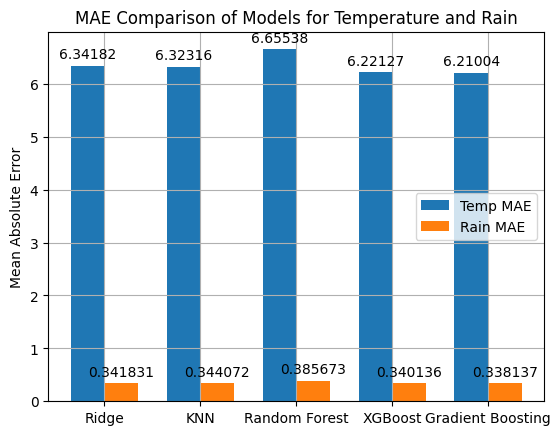

In [187]:
import matplotlib.pyplot as plt

mae_results_temp = {
    "Ridge": temp_ridge["temp_diff"].mean(),
    "KNN": temp_knn["temp_diff"].mean(),
    "Random Forest": temp_rf["temp_diff"].mean(),
    "XGBoost": temp_xgb["temp_diff"].mean(),
    "Gradient Boosting": temp_gbr["temp_diff"].mean()
}

mae_results_rain = {
    "Ridge": rain_logistic["rain_diff"].mean(),
    "KNN": rain_knn["rain_diff"].mean(),
    "Random Forest": rain_rf["rain_diff"].mean(),
    "XGBoost": rain_xgb["rain_diff"].mean(),
    "Gradient Boosting": rain_gbr["rain_diff"].mean()
}

# labels for both tmrw_temp and tmrw_rain
labels = list(mae_results_temp.keys())
temp_mae = list(mae_results_temp.values())
rain_mae = list(mae_results_rain.values())

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, temp_mae, width, label='Temp MAE')
rects2 = ax.bar(x + width/2, rain_mae, width, label='Rain MAE')

# labels, title, and axis tick labels
ax.set_ylabel('Mean Absolute Error')
ax.set_title('MAE Comparison of Models for Temperature and Rain')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.grid(True)
plt.xticks(rotation=0)
plt.show()

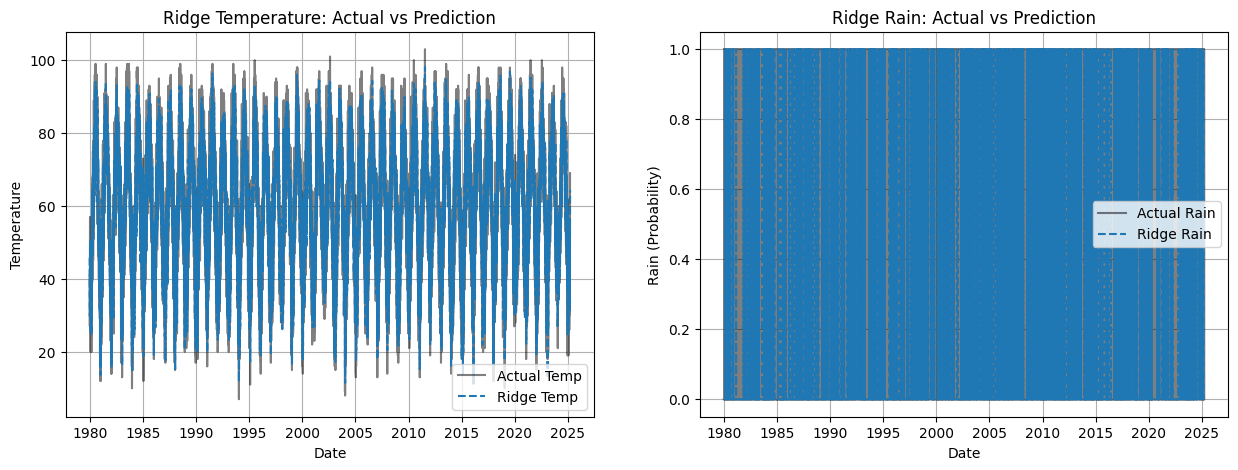

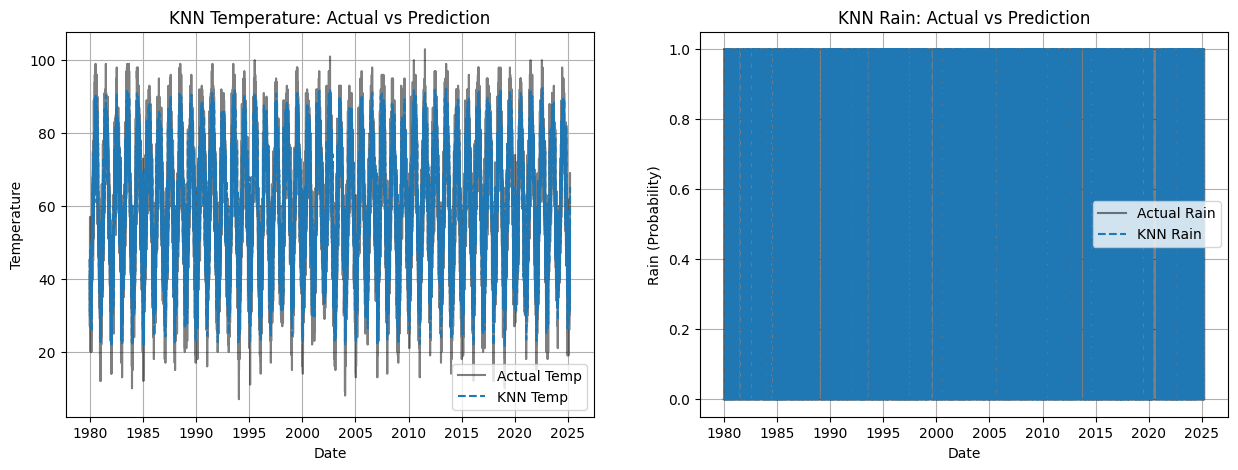

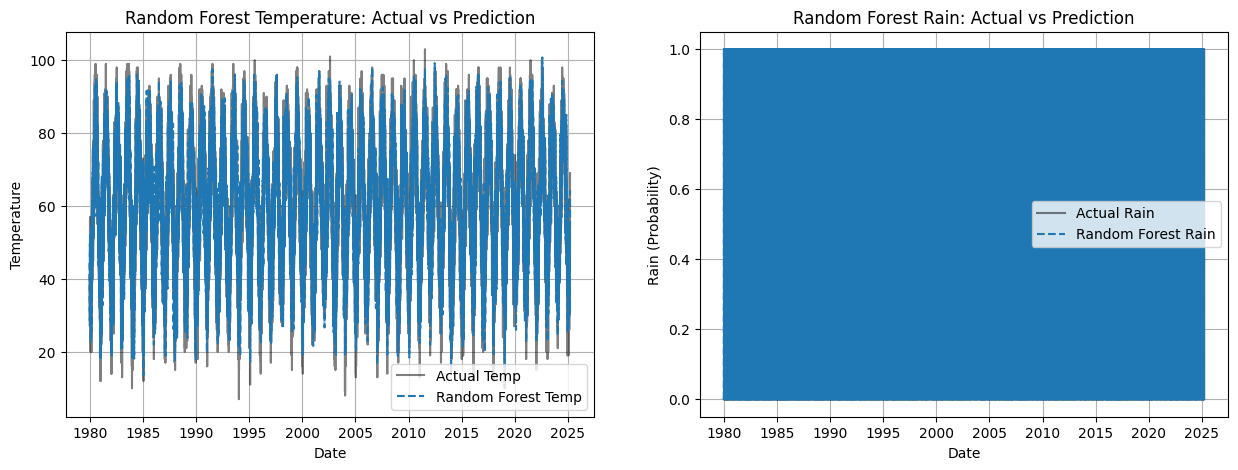

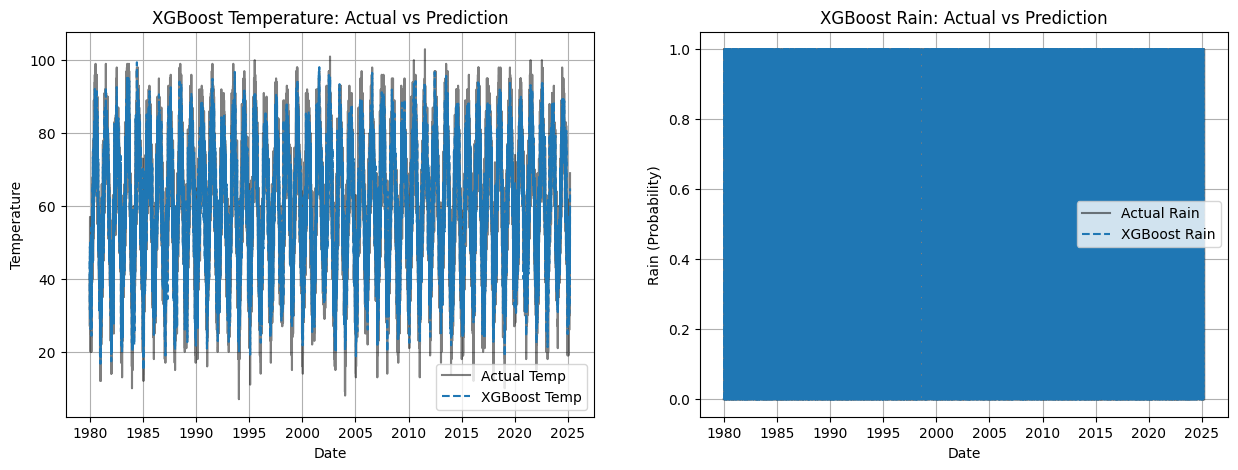

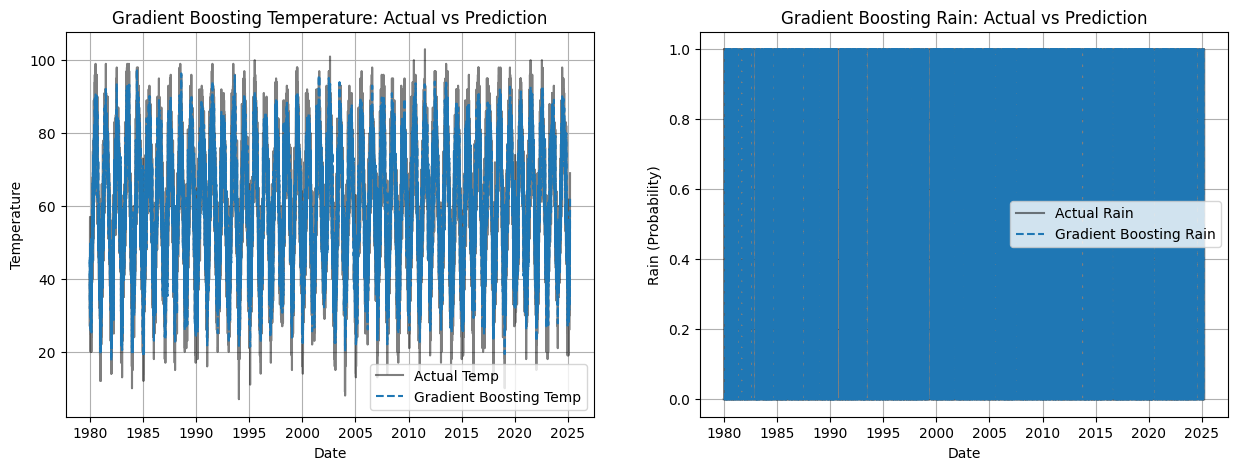

In [194]:
import matplotlib.pyplot as plt

def plot_predictions(predictions_temp, predictions_rain, model_name):
    # Plot Temperature Predictions
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(predictions_temp.index, predictions_temp["actual_temp"], label="Actual Temp", color="black", alpha=0.5)
    plt.plot(predictions_temp.index, predictions_temp["predicted_temp"], label=f"{model_name} Temp", linestyle="--")
    plt.title(f"{model_name} Temperature: Actual vs Prediction")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend()
    plt.grid(True)

    # Plot Rain Predictions
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.plot(predictions_rain.index, predictions_rain["actual_rain"], label="Actual Rain", color="black", alpha=0.5)
    plt.plot(predictions_rain.index, predictions_rain["predicted_rain"], label=f"{model_name} Rain", linestyle="--")
    plt.title(f"{model_name} Rain: Actual vs Prediction")
    plt.xlabel("Date")
    plt.ylabel("Rain (Probability)")
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
plot_predictions(temp_ridge, rain_logistic, "Ridge")
plot_predictions(temp_knn, rain_knn, "KNN")
plot_predictions(temp_rf, rain_rf, "Random Forest")
plot_predictions(temp_xgb, rain_xgb, "XGBoost")
plot_predictions(temp_gbr, rain_gbr, "Gradient Boosting")

In [189]:
# import matplotlib.pyplot as plt

# # 设置图像大小
# plt.figure(figsize=(15, 5))

# # Plot for Ridge Regression Model
# plt.plot(predictions_ridge10.index, predictions_ridge10["actual"], label="Actual", color="black", alpha=0.5)
# plt.plot(predictions_ridge10.index, predictions_ridge10["prediction"], label="Ridge", linestyle="--")

# plt.title("Ridge Regression Actual vs Prediction")
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot for KNN
# plt.plot(predictions_knn10.index, predictions_knn10["actual"], label="Actual", color="black", alpha=0.5)
# plt.plot(predictions_knn10.index, predictions_knn10["prediction"], label="KNN", linestyle="--")

# plt.title("KNN Actual vs Prediction")
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot for Random Forest
# plt.plot(predictions_rf10.index, predictions_rf10["actual"], label="Actual", color="black", alpha=0.5)
# plt.plot(predictions_rf10.index, predictions_rf10["prediction"], label="Random Forest", linestyle="--")

# plt.title("Random Forest: Actual vs Prediction")
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot for XGBoost
# plt.figure(figsize=(15, 5))
# plt.plot(predictions_xgb10.index, predictions_xgb10["actual"], label="Actual", color="black", alpha=0.5)
# plt.plot(predictions_xgb10.index, predictions_xgb10["prediction"], label="XGBoost", linestyle="--")

# plt.title("XGBoost: Actual vs Prediction")
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot for Gradient Boosting
# plt.figure(figsize=(15, 5))
# plt.plot(predictions_gbr10.index, predictions_gbr10["actual"], label="Actual", color="black", alpha=0.5)
# plt.plot(predictions_gbr10.index, predictions_gbr10["prediction"], label="Gradient Boosting", linestyle="--")

# plt.title("Gradient Boosting: Actual vs Prediction")
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

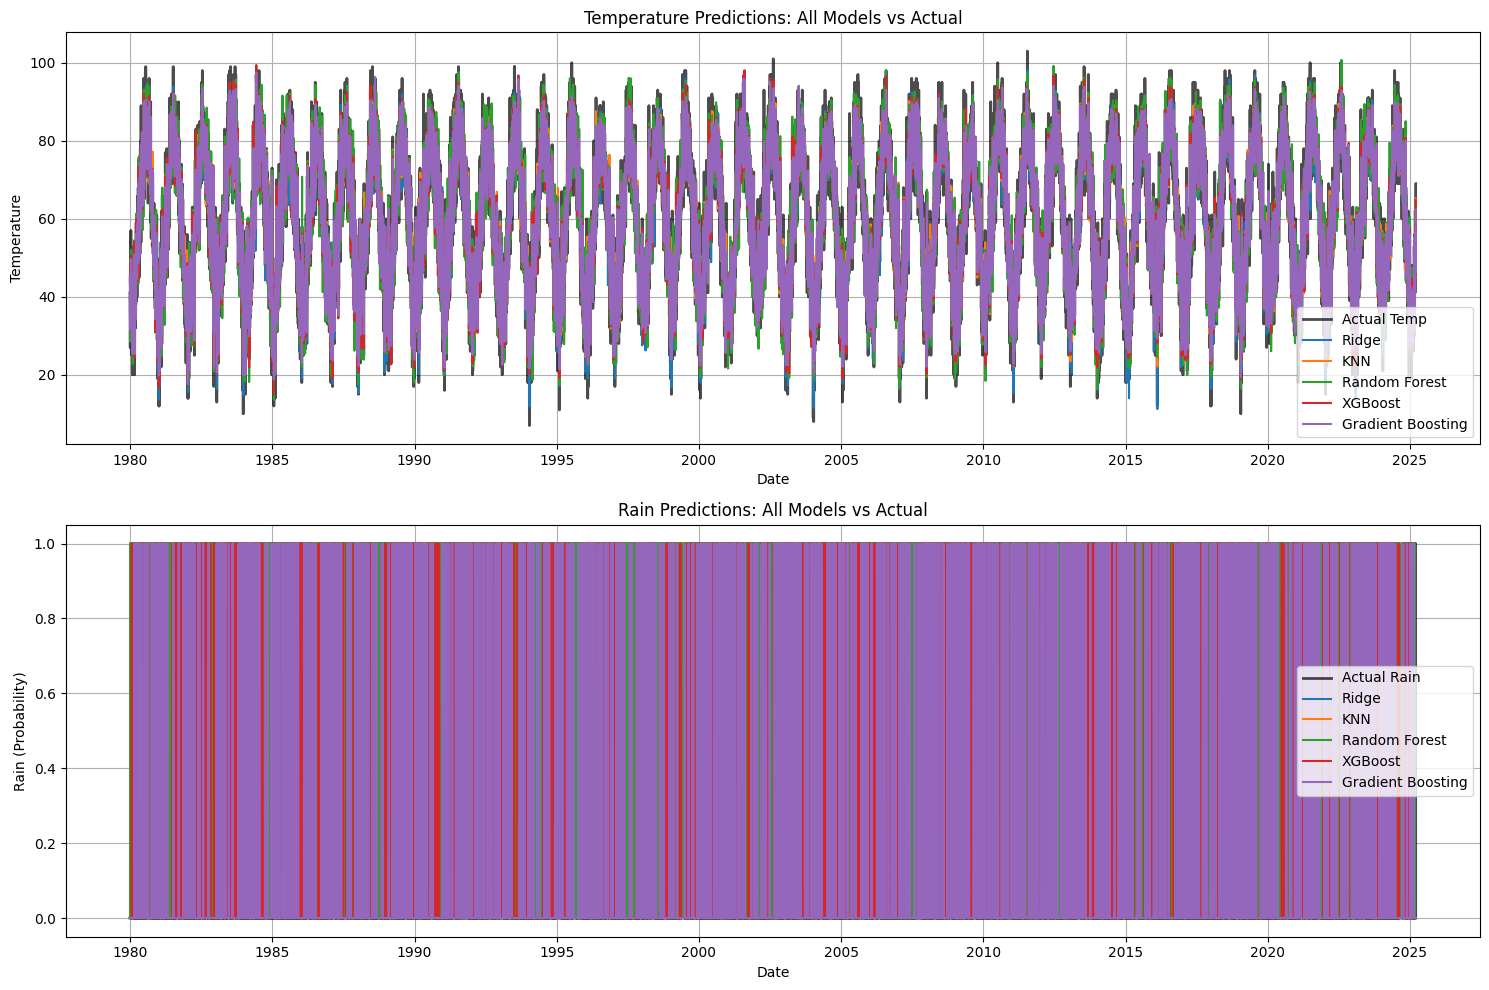

In [190]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))  # 2 rows, 1 column

# Plotting Temperature Predictions
ax1.plot(temp_ridge.index, temp_ridge["actual_temp"], label="Actual Temp", color="black", linewidth=2, alpha=0.7)
ax1.plot(temp_ridge.index, temp_ridge["predicted_temp"], label="Ridge")
ax1.plot(temp_knn.index, temp_knn["predicted_temp"], label="KNN")
ax1.plot(temp_rf.index, temp_rf["predicted_temp"], label="Random Forest")
ax1.plot(temp_xgb.index, temp_xgb["predicted_temp"], label="XGBoost")
ax1.plot(temp_gbr.index, temp_gbr["predicted_temp"], label="Gradient Boosting")

ax1.set_title("Temperature Predictions: All Models vs Actual")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature")
ax1.legend()
ax1.grid(True)

# Plotting Rain Predictions
ax2.plot(rain_logistic.index, rain_logistic["actual_rain"], label="Actual Rain", color="black", linewidth=2, alpha=0.7)
ax2.plot(rain_logistic.index, rain_logistic["predicted_rain"], label="Ridge")
ax2.plot(rain_knn.index, rain_knn["predicted_rain"], label="KNN")
ax2.plot(rain_rf.index, rain_rf["predicted_rain"], label="Random Forest")
ax2.plot(rain_xgb.index, rain_xgb["predicted_rain"], label="XGBoost")
ax2.plot(rain_gbr.index, rain_gbr["predicted_rain"], label="Gradient Boosting")

ax2.set_title("Rain Predictions: All Models vs Actual")
ax2.set_xlabel("Date")
ax2.set_ylabel("Rain (Probability)")
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [191]:
# Attempting to improve accuracy (reduce average difference in temperature) by increasing the amount of data we train on from 10 years to 30 years:

temp_ridge30, rain_logistic30 = backtest(dataset, ridge_model, logistic_model, predictors, start=(365*30))
temp_knn30, rain_knn30 = backtest(dataset, knn_model_temp, knn_model_rain, predictors, start=(365*30))
temp_rf30, rain_rf30 = backtest(dataset, rf_model_temp, rf_model_rain, predictors, start=(365*30))
temp_xgb30, rain_xgb30 = backtest(dataset, xgb_model_temp, xgb_model_rain, predictors, start=(365*30))
temp_gbr30, rain_gbr30 = backtest(dataset, gbr_model_temp, gbr_model_rain, predictors, start=(365*30))

In [192]:
# Measuring how accurate our model is for 30 year predictions using mean absolute error:

import pandas as pd

# tmrw_temp
temp_ridge_mae30 = temp_ridge30["temp_diff"].mean()
temp_knn_mae30 = temp_knn30["temp_diff"].mean()
temp_rf_mae30 = temp_rf30["temp_diff"].mean()
temp_xgb_mae30 = temp_xgb30["temp_diff"].mean()
temp_gbr_mae30 = temp_gbr30["temp_diff"].mean()

# tmrw_rain
rain_logistic_mae30 = rain_logistic30["rain_diff"].mean()
rain_knn_mae30 = rain_knn30["rain_diff"].mean()
rain_rf_mae30 = rain_rf30["rain_diff"].mean()
rain_xgb_mae30 = rain_xgb30["rain_diff"].mean()
rain_gbr_mae30 = rain_gbr30["rain_diff"].mean()

mae_results = {
    'Model': ['Ridge', 'KNN', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
    'Temp MAE 30 Year': [
        round(temp_ridge_mae30, 4),
        round(temp_knn_mae30, 4),
        round(temp_rf_mae30, 4),
        round(temp_xgb_mae30, 4),
        round(temp_gbr_mae30, 4) 
    ],
    'Rain MAE 30 Year': [
        round(rain_logistic_mae30, 4),
        round(rain_knn_mae30, 4),
        round(rain_rf_mae30, 4),
        round(rain_xgb_mae30, 4),
        round(rain_gbr_mae30, 4)
    ]
}

df_mae = pd.DataFrame(mae_results)
print(df_mae.to_string(index=False))

            Model  Temp MAE 30 Year  Rain MAE 30 Year
            Ridge            6.2853            0.3484
              KNN            6.2591            0.3443
    Random Forest            6.4762            0.3821
          XGBoost            6.1151            0.3452
Gradient Boosting            6.1424            0.3425


TypeError: unsupported operand type(s) for +: 'int' and 'method'

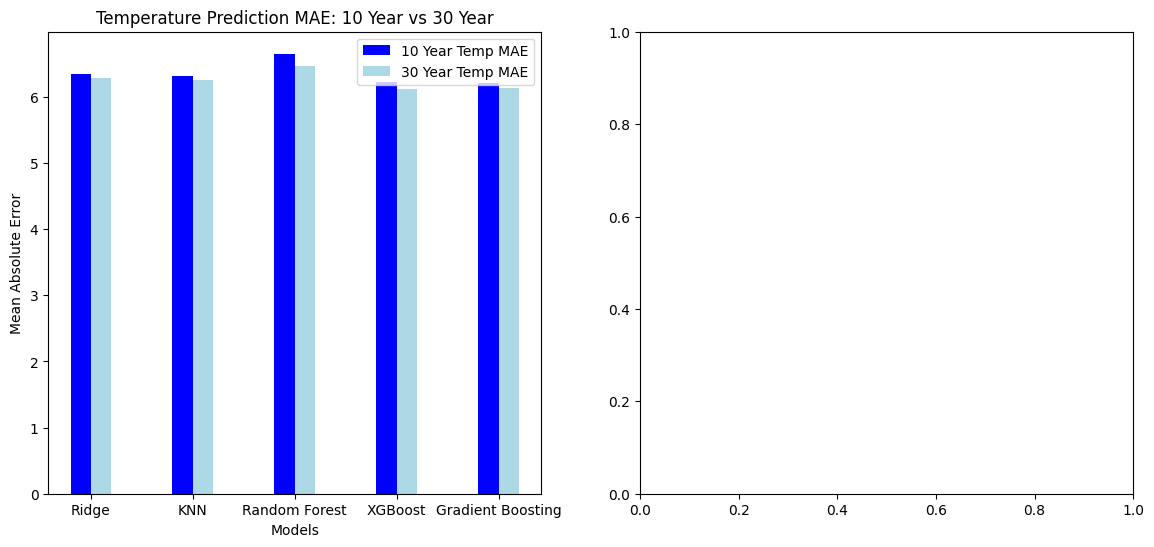

In [193]:
import matplotlib.pyplot as plt
import numpy as np

# All MAE results for both temp and rain (10 and 30 year predictions)
mae_10_year_temp = [temp_ridge["temp_diff"].mean(), temp_knn["temp_diff"].mean(), temp_rf["temp_diff"].mean(), temp_xgb["temp_diff"].mean(), temp_gbr["temp_diff"].mean()]
mae_30_year_temp = [temp_ridge_mae30, temp_knn_mae30, temp_rf_mae30, temp_xgb_mae30, temp_gbr_mae30]

mae_10_year_rain = [rain_logistic["rain_diff"].mean, rain_knn["rain_diff"].mean(), rain_rf["rain_diff"].mean(), rain_xgb["rain_diff"].mean(), rain_gbr["rain_diff"].mean()]
mae_30_year_rain = [rain_logistic_mae30, rain_knn_mae30, rain_rf_mae30, rain_xgb_mae30, rain_gbr_mae30]

models = ['Ridge', 'KNN', 'Random Forest', 'XGBoost', 'Gradient Boosting']

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Temperature MAEs
ax1.bar(x - width/2, mae_10_year_temp, width, label='10 Year Temp MAE', color='blue')
ax1.bar(x + width/2, mae_30_year_temp, width, label='30 Year Temp MAE', color='lightblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('Temperature Prediction MAE: 10 Year vs 30 Year')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# Plot for Rain MAEs
ax2.bar(x - width/2, mae_10_year_rain, width, label='10 Year Rain MAE', color='red')
ax2.bar(x + width/2, mae_30_year_rain, width, label='30 Year Rain MAE', color='pink')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean Absolute Error')
ax2.set_title('Rain Prediction MAE: 10 Year vs 30 Year')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

fig.tight_layout()
plt.show()


In [ ]:
#Measurin how accurate our model is using mean absolute error:
from sklearn.metrics import accuracy_score

# Evaluate each model's prediction accuracy
print("Random Forest Accuracy:", accuracy_score(predictions_rf["actual"], predictions_rf["prediction"]))
print("XGBoost Accuracy:", accuracy_score(predictions_xgb["actual"], predictions_xgb["prediction"]))
print("Gradient Boosting Accuracy:", accuracy_score(predictions_gbr["actual"], predictions_gbr["prediction"]))


In [ ]:
# Threshold predictions to binary
for df in [predictions_rf, predictions_xgb, predictions_gbr]:
    df["pred_binary"] = (df["prediction"] > 0.5).astype(int)

# Pick a 1-year window
start_date = "2024-01-01"
end_date = "2025-01-01"

plot_rf = predictions_rf.loc[start_date:end_date]
plot_xgb = predictions_xgb.loc[start_date:end_date]
plot_gbr = predictions_gbr.loc[start_date:end_date]

plt.figure(figsize=(15, 6))
plt.step(plot_rf.index, plot_rf["actual"], label="Actual", linewidth=2)
plt.step(plot_rf.index, plot_rf["pred_binary"], label="Random Forest")
plt.step(plot_xgb.index, plot_xgb["pred_binary"], label="XGBoost")
plt.step(plot_gbr.index, plot_gbr["pred_binary"], label="Gradient Boosting")

plt.legend()
plt.title("Rain Prediction (Binary) vs Actual – Jan 2024 to Jan 2025")
plt.xlabel("Date")
plt.ylabel("Rain Tomorrow (0 or 1)")
plt.grid(True)
plt.tight_layout()
plt.show()